In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from src.modules.data_preprocessing import time_of_day, feature_categorizer

import warnings
warnings.filterwarnings('ignore')

In [70]:
data = pd.read_csv('data/flights_10000.csv')

In [71]:
data.drop(['Unnamed: 0', 'no_name'], axis=1, inplace=True)

In [72]:
data

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,SAT,...,1.0,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,ORD,...,1.0,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,LAW,...,1.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,SAV,...,1.0,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,DTW,...,1.0,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-07-24,DL,DL_CODESHARE,DL,5194,9E,N924XJ,5194,12197,HPN,...,1.0,780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,2019-12-05,AS,AS_CODESHARE,AS,2489,QX,N649QX,2489,10849,BZN,...,1.0,543.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,2018-03-01,UA,UA_CODESHARE,UA,3687,YX,N744YX,3687,11618,EWR,...,1.0,872.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,2018-10-06,DL,DL_CODESHARE,DL,7395,OO,N914EV,7395,14869,SLC,...,1.0,272.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
data['fl_date'] = pd.to_datetime(data['fl_date'])

In [74]:
df = data

In [75]:
df['dep_time_of_day'] = df.apply(lambda df: time_of_day(df, method='dep'), axis=1)
df['arr_time_of_day'] = df.apply(lambda df: time_of_day(df, method='arr'), axis=1)

In [76]:
feature_categorizer(df[['dep_time_of_day','arr_time_of_day']], df)

In [77]:
flights_M0 = df.select_dtypes(exclude=['object'])

In [78]:
#remove categorical int cols
flights_M0.drop(['mkt_carrier_fl_num', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id', 'dep_time', 'dep_delay', 'taxi_out', 
    'wheels_off', 'wheels_on', 'taxi_in', 'cancelled',
    'first_dep_time', 'total_add_gtime',
    'longest_add_gtime'], axis = 1, inplace = True)

In [79]:
flights_M0.head()

,fl_date,crs_dep_time,crs_arr_time,arr_time,arr_delay,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dep_time_of_day,arr_time_of_day
0,2018-07-10,705,915,913.0,-2.0,0.0,130.0,131.0,112.0,1.0,822.0,NaN,NaN,NaN,NaN,NaN,0,0
1,2019-10-10,800,1148,1139.0,-9.0,0.0,168.0,162.0,134.0,1.0,1005.0,NaN,NaN,NaN,NaN,NaN,0,0
2,2019-07-18,1034,1130,1138.0,8.0,0.0,56.0,58.0,28.0,1.0,140.0,NaN,NaN,NaN,NaN,NaN,0,0
3,2018-11-25,2200,2327,NaN,NaN,0.0,147.0,NaN,NaN,1.0,773.0,NaN,NaN,NaN,NaN,NaN,1,1
4,2018-10-24,841,1039,1107.0,28.0,0.0,298.0,327.0,271.0,1.0,1960.0,0.0,0.0,28.0,0.0,0.0,0,0


In [80]:
flights_M0.fillna(0, inplace = True)

In [81]:
#split date into three cols
import datetime as dt
flights_M0['year'] = flights_M0['fl_date'].dt.year

In [82]:
flights_M0['month'] = flights_M0['fl_date'].dt.month
flights_M0['day'] = flights_M0['fl_date'].dt.day

In [83]:
flights_M0.drop(['fl_date'],axis = 1, inplace = True)

In [84]:
flights_M0.head()

,crs_dep_time,crs_arr_time,arr_time,arr_delay,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dep_time_of_day,arr_time_of_day,year,month,day
0,705,915,913.0,-2.0,0.0,130.0,131.0,112.0,1.0,822.0,0.0,0.0,0.0,0.0,0.0,0,0,2018,7,10
1,800,1148,1139.0,-9.0,0.0,168.0,162.0,134.0,1.0,1005.0,0.0,0.0,0.0,0.0,0.0,0,0,2019,10,10
2,1034,1130,1138.0,8.0,0.0,56.0,58.0,28.0,1.0,140.0,0.0,0.0,0.0,0.0,0.0,0,0,2019,7,18
3,2200,2327,0.0,0.0,0.0,147.0,0.0,0.0,1.0,773.0,0.0,0.0,0.0,0.0,0.0,1,1,2018,11,25
4,841,1039,1107.0,28.0,0.0,298.0,327.0,271.0,1.0,1960.0,0.0,0.0,28.0,0.0,0.0,0,0,2018,10,24


<AxesSubplot:>

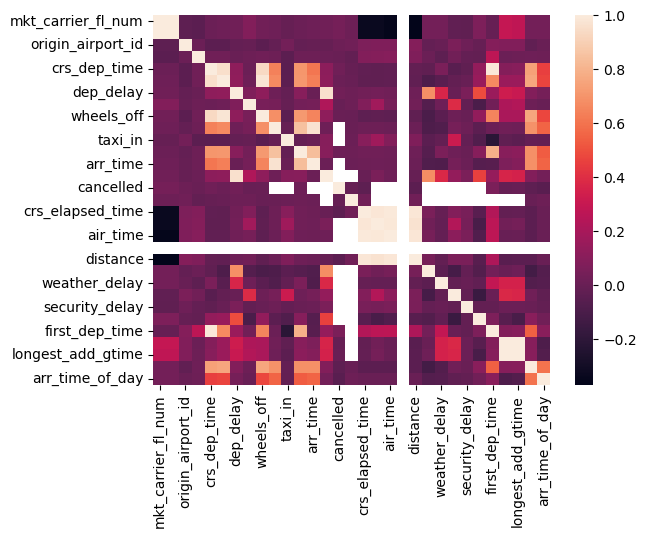

In [85]:
import seaborn as sns
sns.heatmap(df.corr())

<AxesSubplot:>

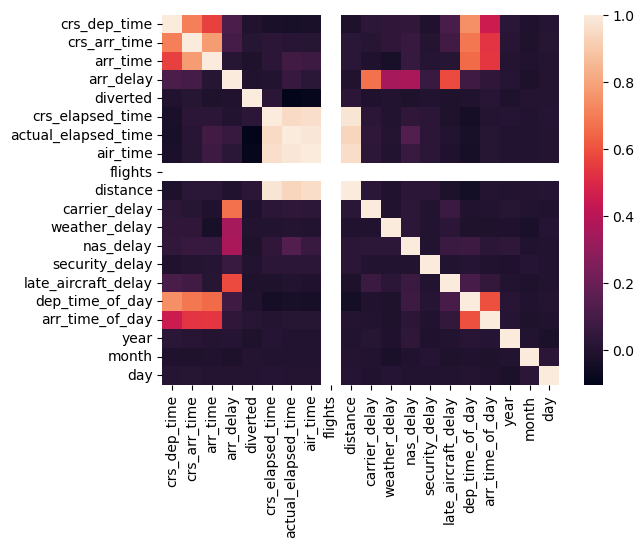

In [86]:
sns.heatmap(flights_M0.corr())

## Model 0
Random Forest, SVR, Linear Regression

In [87]:
flights_M0.columns

Index(['crs_dep_time', 'crs_arr_time', 'arr_time', 'arr_delay', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'dep_time_of_day',
       'arr_time_of_day', 'year', 'month', 'day'],
      dtype='object')

In [88]:
#Declare feature vector and target variable
X = flights_M0.drop(['arr_delay','carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'], axis = 1)
y = flights_M0['arr_delay']

In [89]:
X.columns

Index(['crs_dep_time', 'crs_arr_time', 'arr_time', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'dep_time_of_day', 'arr_time_of_day', 'year', 'month',
       'day'],
      dtype='object')

In [90]:
#maybe add stacked of these three?

# from sklearn.ensemble import StackingRegressor
# stacked = ??
# stacked.fit(X_train, y_train)    
# stacked_prediction = stacked.predict(X_test)

In [91]:
def regression(X, y, regressor_list):
    """
    produce regression and result for a list of regressors
    X = data
    y = target series
    regressor_list = list by regressor module    
    """
    #split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    #scale
    scalar = StandardScaler()
    X_scaled = scalar.fit_transform(X_train)       #fit has a memory, don't use on test
    X_scaled_test = scalar.transform(X_test)           #scalar is an instance that has the memory
    
    #model
    for reg in regressor_list:
        model = reg()                                        # instantiate the regressor
        model.fit(X_scaled, y_train)                            # fit the model
        y_pred = model.predict(X_scaled_test)                   # Predict the Test set results
        MSE = mean_squared_error(y_test, y_pred)
        R2 = r2_score(y_test, y_pred)
        print(f'Regressor: {reg} \n MSE = {MSE} \n R2 = {R2} \n ----------------------------')

In [92]:
regressor_list = [LinearRegression, SVR, RandomForestRegressor]

In [93]:
regression(X, y, regressor_list)

Regressor: <class 'sklearn.linear_model._base.LinearRegression'> 
 MSE = 2075.593818647283 
 R2 = 0.11644163323975487 
 ----------------------------
Regressor: <class 'sklearn.svm._classes.SVR'> 
 MSE = 2232.2891764249603 
 R2 = 0.04973807440607725 
 ----------------------------
Regressor: <class 'sklearn.ensemble._forest.RandomForestRegressor'> 
 MSE = 152.6565565 
 R2 = 0.9350157162135468 
 ----------------------------


X = ['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'flights',
       'distance', 'dep_time_of_day', 'arr_time_of_day', 'year', 'month',
       'day']
<br>
<br>
Regressor: <class 'sklearn.linear_model._base.LinearRegression'> 
<br>
 MSE = 2317.4255063480045 
<br>
 R2 = 0.013496437943799178 
 ----------------------------
Regressor: <class 'sklearn.svm._classes.SVR'>
<br>
 MSE = 2363.282814324821
<br>
 R2 = -0.006024533729947823 
 ----------------------------
Regressor: <class 'sklearn.ensemble._forest.RandomForestRegressor'> 
<br>
 MSE = 794.8294938
<br>
 R2 = 0.6616494792548125 
 ----------------------------
  ----------------------------

X = ['crs_dep_time', 'crs_arr_time', 'arr_time', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'dep_time_of_day', 'arr_time_of_day', 'year', 'month',
       'day']
<br>    
Regressor: <class 'sklearn.linear_model._base.LinearRegression'> 
 <br>
 MSE = 2075.593818647283 
 <br>
 R2 = 0.11644163323975487 
 ----------------------------
Regressor: <class 'sklearn.svm._classes.SVR'> 
 <br>
 MSE = 2232.2891764249603 
 <br>
 R2 = 0.04973807440607725 
 ----------------------------
Regressor: <class 'sklearn.ensemble._forest.RandomForestRegressor'> 
 <br>
 MSE = 152.6565565 
 <br>
 R2 = 0.9350157162135468 
 ----------------------------

In [98]:
data[['dest_city_name','origin_city_name']]

,dest_city_name,origin_city_name
0,"Nashville, TN","San Antonio, TX"
1,"Orlando, FL","Chicago, IL"
2,"Dallas/Fort Worth, TX","Lawton/Fort Sill, OK"
3,"Chicago, IL","Savannah, GA"
4,"Santa Ana, CA","Detroit, MI"
...,...,...
9995,"Atlanta, GA","White Plains, NY"
9996,"Seattle, WA","Bozeman, MT"
9997,"St. Louis, MO","Newark, NJ"
9998,"St. George, UT","Salt Lake City, UT"


In [99]:
def state_codes(row):
    return 

In [100]:
data2 = pd.DataFrame(data.origin_city_name.str.split(', ',1).tolist(),
                                 columns = ['city','state_code'])

In [102]:
pd.concat([data, data2])

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,city,state_code
0,2018-07-10,WN,WN,WN,2212.0,WN,N958WN,2212.0,14683.0,SAT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-10,UA,UA,UA,206.0,UA,N68811,206.0,13930.0,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-18,AA,AA_CODESHARE,AA,4221.0,MQ,N694AE,4221.0,12891.0,LAW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-11-25,UA,UA_CODESHARE,UA,4822.0,ZW,NaN,4822.0,14685.0,SAV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-24,DL,DL,DL,957.0,DL,N693DL,957.0,11433.0,DTW,...,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White Plains,NY
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bozeman,MT
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Newark,NJ
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salt Lake City,UT


In [113]:
state_codes = {'Pacific' : ['AK', 'CA', 'HI', 'OR', 'WA'],
               'North-West': ['MT', 'ID', 'WY'],
               'South-West': ['AZ', 'NM', 'CO', 'NV', 'UT'],
               'East-North Central' : ['IL', 'IN', 'MI', 'OH', 'WI'],
               'West-North Central' : ['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'],
               'New England' : ['MA', 'ME', 'NH', 'VT', 'RI', 'CT'],
               'Mid-Atlantic' : ['DE', 'MD', 'NJ', 'PA', 'NY', 'VA', 'WV'],
               'South-Atlantic' : ['FL', 'GA', 'NC', 'SC'],
               'East-South Central' : ['AL', 'KY', 'MS', 'TN'],
               'West-South Central' : ['AR', 'LA', 'OK', 'TX']
}

In [82]:
def time_of_day(df, method='dep'):  
    """
    Creates time of day column based on dataframe values for actual departure time and actual arrival time using mapping.  
   
    500 - 1200: Morning
    1200 - 1700: Afternoon
    1700 - 2100: Evening
    2100 - 2399 OR 0 - 499: Nite
    
    Input: df = Dataframe
           method = 'dep' - departures
                    'arr' - arrivals
           
    """
    if method == 'dep':
        if (df['dep_time'] >=500 and df['dep_time'] < 1200):
            return 'Morning'
        elif (df['dep_time'] >=1200 and df['dep_time'] < 1700):
            return 'Afternoon'        
        elif (df['dep_time'] >= 1700 and df['dep_time'] < 2100): 
            return 'Evening'
        return 'Night'
    
    elif method == 'arr':
        if (df['arr_time'] >=500 and df['arr_time'] < 1200):
            return 'Morning'
        elif (df['arr_time'] >=1200 and df['arr_time'] < 1700):
            return 'Afternoon'        
        elif (df['arr_time'] >= 1700 and df['arr_time'] < 2100) :
            return 'Evening'

In [83]:
def feature_categorizer(df):
    """
    This function will call other functions within data_preprocessing.py and write their outputs to a new csv file with the 
    additional features created by the other functions. 
    
    df: DataFrame (categorical)
    """
    
    temp_df = df.select_dtypes(include='object')
    
    for column in temp_df.columns:
        map_dict = {}
        for key, value in enumerate(temp_df[column].unique()):
            map_dict[value] = key
        
        df[column] = df[column].map(map_dict)
    
# This is Ordinal Encoding ^^^^

# Groupby origin airport (categorical)
    # Get the mean of delay
    # assign to column
    # drop origin airport

# Tail number maintenance records
    # Find public lookup tools
        # correlate age of planes with delays
            # Regression tree might fit well here
    
# Bucket airports based on region

# Carrier average delay (day, week, month)
    # Low, medium, high
    
# HIGH CARDINALITY

In [84]:
data.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,SAT,...,1.0,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,ORD,...,1.0,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,LAW,...,1.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,SAV,...,1.0,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,DTW,...,1.0,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN


In [85]:
feature_categorizer(data)

In [86]:
data

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,0,0,0,0,2212,0,0,2212,14683,0,...,1.0,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,1,206,1,1,206,13930,1,...,1.0,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,2,4221,2,2,4221,12891,2,...,1.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,3,1,4822,3,3,4822,14685,3,...,1.0,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3,4,3,957,4,4,957,11433,4,...,1.0,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,504,3,8,3,5194,16,359,5194,12197,37,...,1.0,780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,399,6,9,6,2489,11,4617,2489,10849,227,...,1.0,543.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,326,1,3,1,3687,8,4618,3687,11618,29,...,1.0,872.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,318,3,8,3,7395,10,3928,7395,14869,21,...,1.0,272.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
